<a href="https://colab.research.google.com/github/Rustydinoco/ML_Learning/blob/master/Stock_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score


In [ ]:
#Mengambil data Saham NVIDIA dari Yahoo Finance
ticket = "NVDA"
df = yf.download(ticket, start ="2015-01-01", end="2025-01-01")
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-01-02,0.483099,0.486699,0.475419,0.483099,113680000
2015-01-05,0.474939,0.484539,0.472779,0.483099,197952000
2015-01-06,0.460540,0.476139,0.460060,0.475659,197764000
2015-01-07,0.459340,0.467980,0.457900,0.463900,321808000
2015-01-08,0.476619,0.479499,0.464380,0.464620,283780000
...,...,...,...,...,...
2024-12-24,140.207108,141.886946,138.637245,139.987127,105157000
2024-12-26,139.917130,140.837058,137.717335,139.687155,116205600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   2516 non-null   float64
 1   (High, NVDA)    2516 non-null   float64
 2   (Low, NVDA)     2516 non-null   float64
 3   (Open, NVDA)    2516 non-null   float64
 4   (Volume, NVDA)  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,20.788325,21.166383,20.376766,20.790772,4.676480e+08
std,32.316662,32.919272,31.677342,32.354115,2.536131e+08
min,0.459340,0.467980,0.454540,0.463660,5.244800e+07
25%,3.545283,3.595112,3.450053,3.515880,3.055120e+08
50%,6.483051,6.540366,6.338711,6.441334,4.151695e+08
75%,21.230174,21.734932,20.808321,21.168403,5.640210e+08
max,148.856064,152.865409,146.236457,149.325985,3.692928e+09


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


In [ ]:
MinMaxScaler = MinMaxScaler()
df_scaled = MinMaxScaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
0,0.000160,0.000123,0.000143,0.000131,0.016820
1,0.000105,0.000109,0.000125,0.000131,0.039968
2,0.000008,0.000054,0.000038,0.000081,0.039917
3,0.000000,0.000000,0.000023,0.000002,0.073990
4,0.000116,0.000076,0.000067,0.000006,0.063544
...,...,...,...,...,...
2511,0.941717,0.927962,0.947873,0.937265,0.014479
2512,0.939763,0.921072,0.941563,0.935250,0.017514
2513,0.920088,0.909065,0.920849,0.927525,0.032450


In [ ]:
X = df_scaled[['Open', 'High', 'Low', 'Volume']]
y = df_scaled['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred_fix = y_pred.ravel()
y_test = y_test.iloc[:, 0]
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_fix})
pred_df

,Actual,Predicted
2012,0.095229,0.094585
2013,0.095303,0.094625
2014,0.093290,0.093551
2015,0.096212,0.094864
2016,0.092953,0.093085
...,...,...
2511,0.941717,0.944633
2512,0.939763,0.934944
2513,0.920088,0.912745
2514,0.923322,0.932242


In [ ]:
print(y_pred_fix.shape)
print(y_test.shape)

(504,)
(504,)


In [ ]:
print("R2", round(r2_score(y_test, y_pred),2))

R2 1.0


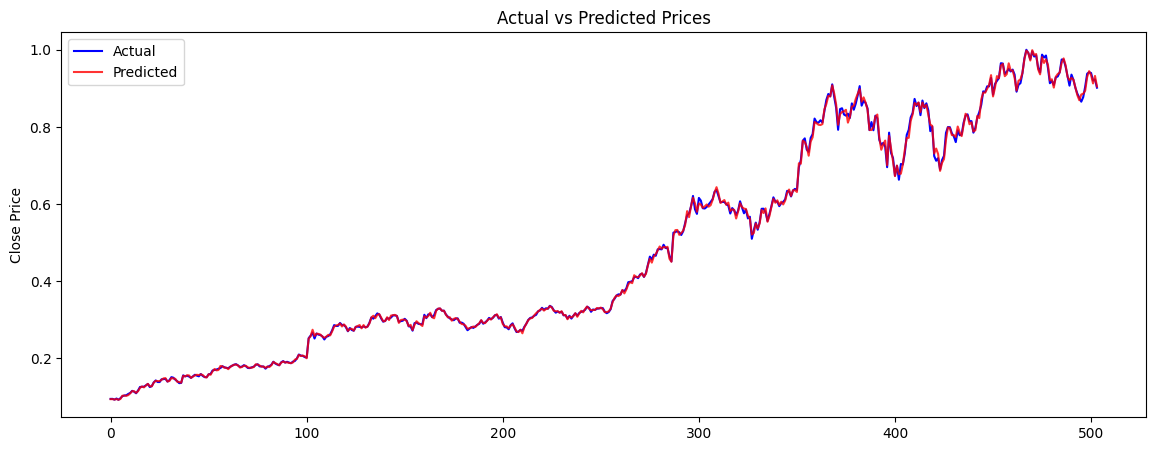

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(range(len(y_test)),y_test, label='Actual', color ='blue')
plt.plot(range(len(y_pred_fix)),y_pred_fix, label='Predicted', color ='red', alpha = 0.8)
plt.ylabel('Close Price')
plt.xlabel('Days')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()